
# Predict Diabetes Progression with Linear Regression

### Diabetes dataset

Ten baseline variables - **age, sex, body mass index, average blood
pressure, and six blood serum measurements** were obtained for each of 
n = 442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

**Number of Instances: 442**

**Number of Attributes: First 10 columns are numeric predictive values**

**Target: Column 11 is a quantitative measure of disease progression one year after baseline**

**Attribute Information:**
      **- Age**
      **- Sex**
      **- Body mass index**
      **- Average blood pressure**
      **- S1**
      **- S2**
      **- S3**
      **- S4**
      **- S5**
      **- S6**

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.
(https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)


In [4]:
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

### Read Dataset

In [5]:
#------------------------------------------------------
# Import necessary library
#--------------------------------------------------
# Load the diabetes dataset
data = datasets.load_diabetes()

# Descrive the whole dataset
#print(data.DESCR)

# Get the features
diabetes_X = data.data
# Get the labels
y = data.target

print('\n Total number of samples = ', diabetes_X.shape[0])
print('\n The number of features = ', diabetes_X.shape[1])
#print('\n y.shape = ', y.shape)


 Total number of samples =  442

 The number of features =  10


In [6]:
# Use only one feature
# We will build a Simple Linear Regression Model

# Feature 3 - Average Blood Pressure
# Feature 4 - Blood Serum Measurement 

# Feature 2 - BMI
X = diabetes_X[:, np.newaxis, 2]

print('\n X_shape = ', X.shape)

# Split the data into training/testing sets
# last 20 samples are kept as Test data, rest are in Trainineg dataset
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]


 X_shape =  (442, 1)


### Build and Train a Siimple Linear Regression Model

In [7]:
#-------------------------------------------------
# Create Linear Regression object
regr = LinearRegression()

# Train the model on the training set
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Check the trained model parameters
# The intercept
print('\n Intercept (beta_0): \n', regr.intercept_)
# The coefficients
print('\n Coefficients (beta_1): \n', regr.coef_)


 Intercept (beta_0): 
 152.91886182616167

 Coefficients (beta_1): 
 [938.23786125]


### Evaluate on Test Set

In [9]:
# Evaluate the trained model on the test set
#--------------------------------------------------
y_pred = regr.predict(X_test)

# The mean squared error
print('\n Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))

# The Coefficient of Determination: 1 is perfect prediction
print('\n Coefficient of Determination: %.2f \n\n' % r2_score(y_test, y_pred))


 Mean Squared Error: 2548.07

 Coefficient of Determination: 0.47 




### Plot the Decision Plane

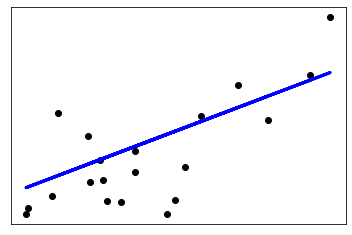

In [10]:
#-----------------------------------------------------
# Plot outputs
#-----------------------------------------------------
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

### Build a Multiple Linear Regression Model

In [11]:
# Use only one feature
# We will build a Multiple Linear Regression Model

# Feature 0 - Age
# Feature 1 - Sex
# Feature 2 - BMI
# Feature 3 - Average Blood Pressure
# Feature 4 - Blood Serum Measurement 
#X = diabetes_X[:, [0, 1, 2, 3, 4]]

X = diabetes_X[:, [0, 1, 2]]

#X = diabetes_X[:, [0, 1, 2, 4]]

# Split the data into training/testing sets
# last 20 samples are kept as Test data, rest are in Trainineg dataset
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

In [12]:
X_train.shape

(422, 3)

### Build and Train the Model

In [13]:
#-------------------------------------------------
# Create Linear Regression object
regr = LinearRegression()

# Train the model on the training set
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Check the trained model parameters
# The intercept
print('\n Intercept (beta_0): \n', regr.intercept_)
# The coefficients
print('\n Coefficients (beta_1): \n', regr.coef_)


 Intercept (beta_0): 
 152.869177291775

 Coefficients (beta_1): 
 [144.25978848 -33.43463042 914.07000914]


### Evaluate

In [15]:
# Evaluate the trained model on the test set
#--------------------------------------------------
y_pred = regr.predict(X_test)

# The mean squared error
print('\n Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))

# The Coefficient of Determination: 1 is perfect prediction
print('\n Coefficient of Determination: %.2f \n\n' % r2_score(y_test, y_pred))


 Mean Squared Error: 2585.66

 Coefficient of Determination: 0.46 




# OLS from statsmodels

In [50]:
# Feature 0 - Age
# Feature 1 - Sex
# Feature 2 - BMI
# Feature 3 - Average Blood Pressure
# Feature 4 - Blood Serum Measurement - S1
# Feature 5 - Blood Serum Measurement - S2
# Feature 6 - Blood Serum Measurement - S3
# Feature 7 - Blood Serum Measurement - S4
# Feature 8 - Blood Serum Measurement - S5
# Feature 9 - Blood Serum Measurement - S6


X = diabetes_X[:, [1,2,3,4]]

#X = diabetes_X[:, [2, 3, 4, 5]]


# Split the data into training/testing sets
# last 20 samples are kept as Test data, rest are in Trainineg dataset
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

In [53]:
import numpy as np
import statsmodels.api as sm

sm.add_constant(X_train)
# Fit and summarize OLS model
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.085
Model:                            OLS   Adj. R-squared (uncentered):              0.076
Method:                 Least Squares   F-statistic:                              9.692
Date:                Tue, 22 Sep 2020   Prob (F-statistic):                    1.67e-07
Time:                        14:44:37   Log-Likelihood:                         -2751.5
No. Observations:                 422   AIC:                                      5511.
Df Residuals:                     418   BIC:                                      5527.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------